In [1]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
from scipy.ndimage.measurements import label

from subsample_lesson_fcns import *

dist_pickle = pickle.load( open("p5_pickle.p", "rb" ) )
svc = dist_pickle["svc"]
X_scaler = dist_pickle["scaler"]
orient = dist_pickle["orient"]
pix_per_cell = dist_pickle["pix_per_cell"]
cell_per_block = dist_pickle["cell_per_block"]
spatial_size = dist_pickle["spatial_size"]
hist_bins = dist_pickle["hist_bins"]
colorspace = dist_pickle["colorspace"]
hog_channel = dist_pickle["hog_channel"]
image_format = dist_pickle["image_format"]

print("orient = {}, pix_per_cell = {}, cells_per_block = {}, spatial_size = {}, hist_bins = {}, colorspace = {}".format(
    orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, colorspace))
print("hog channel = {}, image_format = {}".format(hog_channel, image_format))

ystart = 400
ystop = 656
scale = 1.5


orient = 9, pix_per_cell = 8, cells_per_block = 2, spatial_size = (32, 32), hist_bins = 32, colorspace = YCrCb
hog channel = ALL, image_format = png


(720, 1280, 3) uint8
(720, 1280, 3)
(256, 1280, 3) 1.0
(256, 1280, 3) 1.0
5
(720, 1280, 3)
(256, 1280, 3) 1.0
(256, 1280, 3) 1.0


C:\Users\mcb\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


1
(720, 1280, 3)
(256, 1280, 3) 1.0
(256, 1280, 3) 1.0
5
11


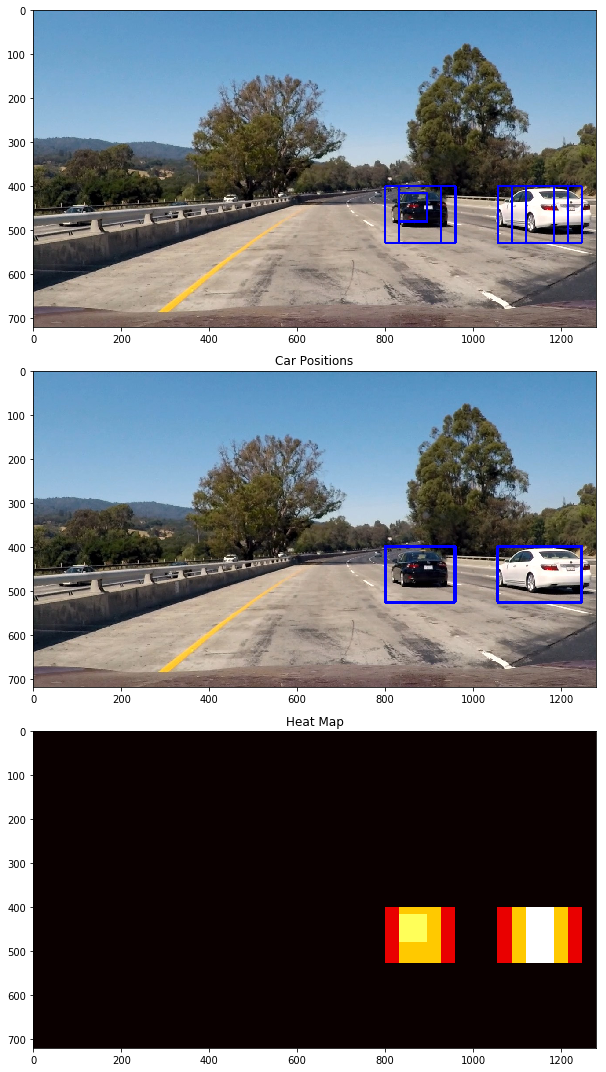

In [13]:
img = mpimg.imread('test_images/test1.jpg')
print(img.shape, img.dtype)
bbox_list = []
bbox_list = find_cars(img, ystart, ystop, scale, svc, X_scaler, 
                                 orient, pix_per_cell, cell_per_block, 
                                 spatial_size, hist_bins, colorspace)
print(len(bbox_list))

ystart = 400
ystop = 656
scale = 1.0
bbox_list1 = find_cars(img, ystart, ystop, scale, svc, X_scaler, 
                                 orient, pix_per_cell, cell_per_block, 
                                 spatial_size, hist_bins, colorspace)
print(len(bbox_list1))

ystart = 400
ystop = 656
scale = 2.0
bbox_list2 = find_cars(img, ystart, ystop, scale, svc, X_scaler, 
                                 orient, pix_per_cell, cell_per_block, 
                                 spatial_size, hist_bins, colorspace)
print(len(bbox_list2))

bbox_list += bbox_list1 + bbox_list2
print(len(bbox_list))

out_image = draw_bboxes(img, bbox_list)

plt.figure(figsize=(10,20))
#plt.imshow(out_image)


heat = np.zeros_like(img[:,:,0]).astype(np.float)

# Add heat to each box in box list
heat = add_heat(heat,bbox_list)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat,1)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(img), labels)

fig = plt.figure(figsize=(10,15))
plt.subplot(311)
plt.imshow(out_image)
plt.subplot(312)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(313)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()


(720, 1280, 3)
(256, 1280, 3) 1.0
(256, 1280, 3) 0.997765


C:\Users\mcb\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


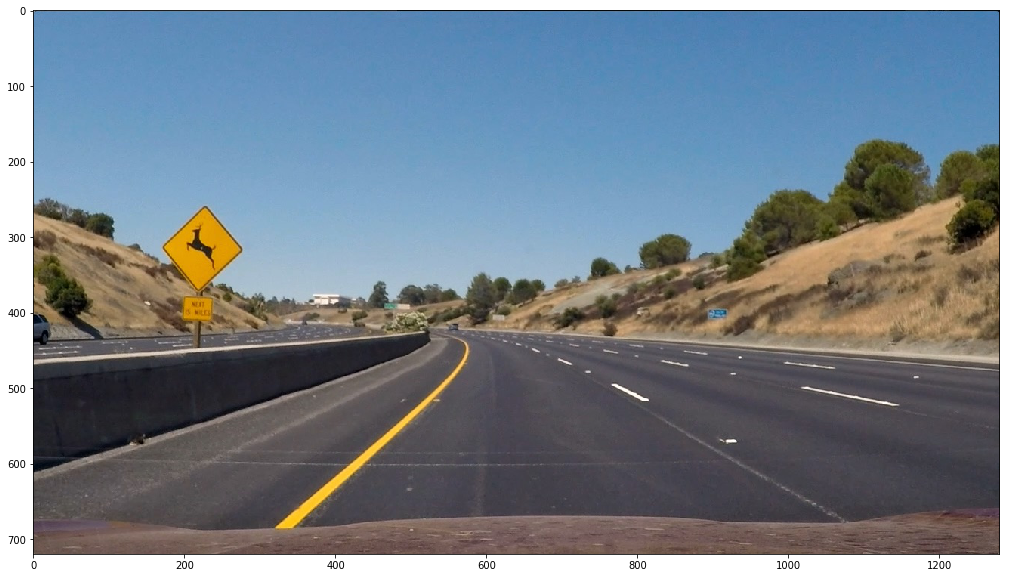

In [3]:
img = mpimg.imread('test_images/test2.jpg')    
bbox_list = find_cars(img, ystart, ystop, scale, svc, X_scaler, 
                                 orient, pix_per_cell, cell_per_block, 
                                 spatial_size, hist_bins, colorspace)
out_image = draw_bboxes(img, bbox_list)

plt.figure(figsize=(20,10))
plt.imshow(out_image)
plt.imsave("test1-output.png", out_image)


(720, 1280, 3)
(256, 1280, 3) 1.0
(256, 1280, 3) 1.0


C:\Users\mcb\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


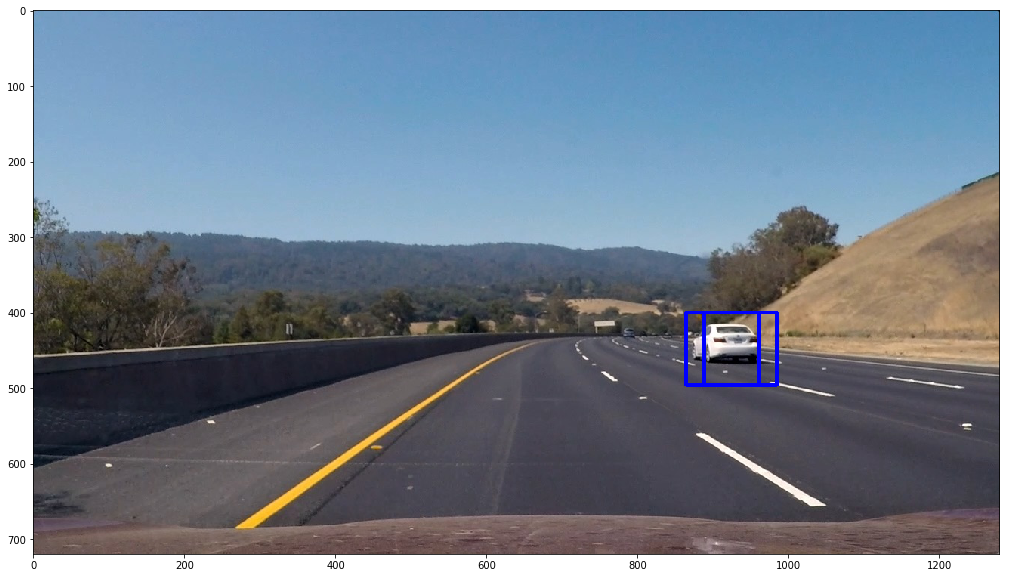

In [4]:
img = mpimg.imread('test_images/test3.jpg')    
bbox_list = find_cars(img, ystart, ystop, scale, svc, X_scaler, 
                                 orient, pix_per_cell, cell_per_block, 
                                 spatial_size, hist_bins, colorspace)
out_image = draw_bboxes(img, bbox_list)

plt.figure(figsize=(20,10))
plt.imshow(out_image)

(720, 1280, 3)
(256, 1280, 3) 1.0
(256, 1280, 3) 1.0


C:\Users\mcb\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


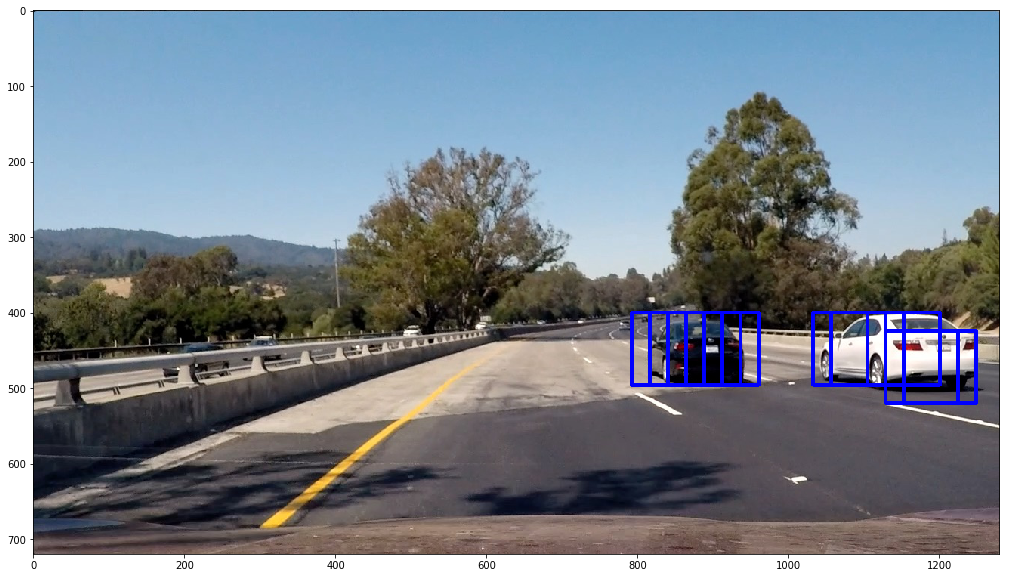

In [5]:
img = mpimg.imread('test_images/test4.jpg')    
bbox_list = find_cars(img, ystart, ystop, scale, svc, X_scaler, 
                                 orient, pix_per_cell, cell_per_block, 
                                 spatial_size, hist_bins, colorspace)
out_image = draw_bboxes(img, bbox_list)

plt.figure(figsize=(20,10))
plt.imshow(out_image)

(720, 1280, 3)
(256, 1280, 3) 1.0
(256, 1280, 3) 1.0


C:\Users\mcb\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


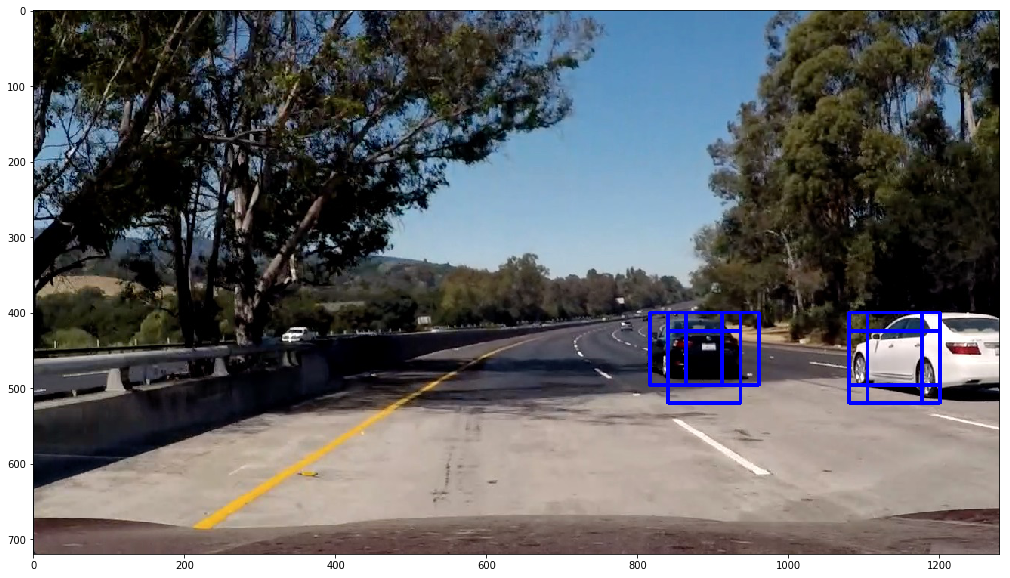

In [6]:
img = mpimg.imread('test_images/test5.jpg')    
bbox_list = find_cars(img, ystart, ystop, scale, svc, X_scaler, 
                                 orient, pix_per_cell, cell_per_block, 
                                 spatial_size, hist_bins, colorspace)
out_image = draw_bboxes(img, bbox_list)

plt.figure(figsize=(20,10))
plt.imshow(out_image)